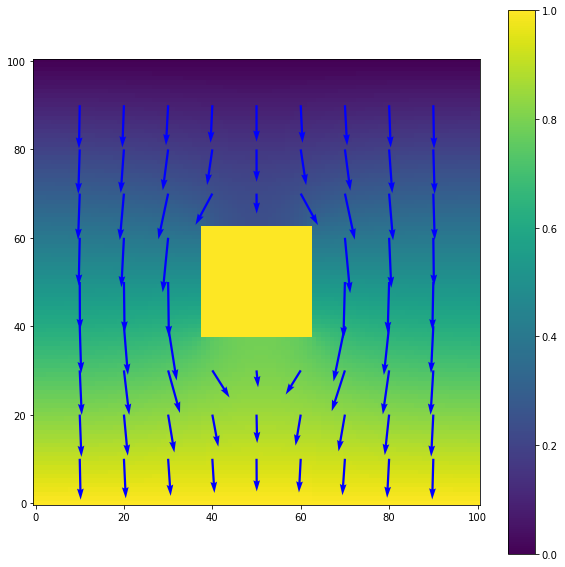

In [121]:
#This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
#as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:

# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi

#Functions to find Velocity vectors
def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

#Setting things up
L = 100
PHI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101): #Bottom bar = 1 (unchanged)
    PHI[i, 0] = 1

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))

#Setting up the object mask and making it visible (PHI = 1)

position1 = 38
position2 = position1 + 25
for i in range(position1, position2):
    for j in range(position1, position2):
        Object[i, j] = 0.5 
        
for i in range(position1, position2):
    for j in range(position1, position2):
        PHI[i, j] = 0.5

while error>error_tolerance:
    Pold = PHI.copy()
    error = 0
    
    for i in range(0, 101):
        for j in range(1, 100):
            if Object[i, j] == 0: #object mask
                if i == 0 or i == 100: #making sides repeat

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PHI[100, j]+Pold[i, j+1]+PHI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])

                elif i == 37 and j in range(38, 64):  #ALL of this is to make the Jacobi method work 
                    Pstar = (1/4)*(Pold[i, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1]) #This code was later redesigned to be the
                    deltaP = Pstar - Pold[i, j]                                     # the Jacobi helpers
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                        
                elif i == 63 and j in range(38, 64):
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                
                elif i in range(38, 64) and (j == 37 or j == 63):
                    if j == 37:
                        Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j]+PHI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])
                       
                    if j == 63:
                        Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])
                    
                  # No more helping, this is just standard objectless SOR  
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])

#Setting up vector fields and quiver
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])


#This is to create the correct vectors (I know I should have used a mask here but I was struggling to, may revise)
mask = zeros([101, 101], dtype= bool)
for i in range(1, 3):
    for j in range(1, 10):
        [Vx, Vy] = VFieldFinder1(PHI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = Vx 
        Vy1[10*(i), 10*(j)] = Vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j

for i in range(3, 8):
    for j in range(1, 6):
        [Vx, Vy] = VFieldFinder1(PHI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = Vx 
        Vy1[10*(i), 10*(j)] = Vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j
        
    for j in range(7, 10):
        [Vx, Vy] = VFieldFinder1(PHI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = Vx 
        Vy1[10*(i), 10*(j)] = Vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j

for i in range(8, 10):
    for j in range(2, 10):
        [Vx, Vy] = VFieldFinder1(PHI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = Vx 
        Vy1[10*(i), 10*(j)] = Vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j
        
for i in range(1, 4):
    for j in range(1, 10):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j

for i in range(4, 7):
    for j in range(1, 6):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j
        
    for j in range(7, 10):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j

for i in range(7, 10):
    for j in range(1, 10):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j
        
mask = np.logical_or(Vx2 != 0, Vy2 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]


PHI += Object


figure = plt.figure(figsize = (10, 10))
#quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PHI.transpose(), origin = 'lower')
colorbar()

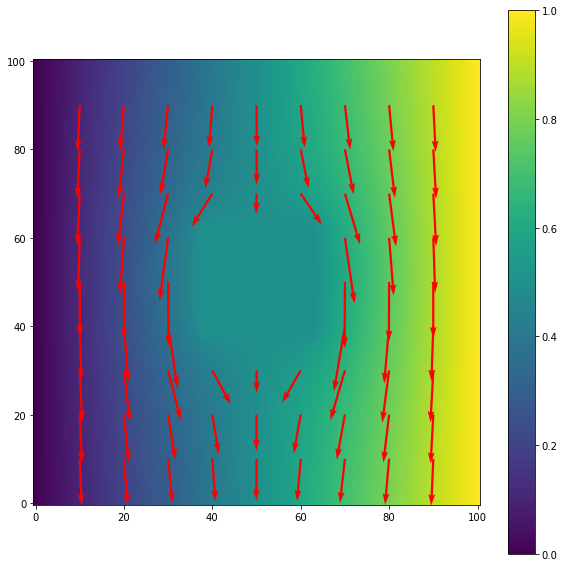

In [113]:
from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi

#Functions for vectors
def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

#Setting things up
L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for j in range(0, 101):
    PSI[100, j] = 1
    
for j in range(0, 101):
    for i in range(0, 101):
        PSI[i, j] = i / 100


position1 = 38 
position2 = position1+26
    

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))


#box 
for i in range(position1, position2):
    for j in range(position1, position2):
        Object[i, j] = 1
        
for i in range(position1, position2):
    for j in range(position1, position2):
        PSI[i, j] = 0.5

        
# Different initial values for PSI in the Object cause the stream to have a preferential flow either one way or another around
# the object. When the object's PSI value seems to be the same as the initial PSI conditions around it, the stream flow around
# either side of the object seems even. However, this aspect of the stream function to allow the stream direction to be 
# based on the object's inherent PSI value as opposed to vxclusively its shape makes me wonder about the physical validity of 
# this equation when there are object's present (I understand the vxtreme advantages in complicated closed domain problems
# with no objects present)

#We will continue to work and research


while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(1, 100):
        for j in range(1, 100):
            if Object[i, j] == 0:
                if i == 0 or i == 100:

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                    
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

                    
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)
for i in range(1, 10):
    for j in range(1, 10):
        [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = vx 
        Vy1[10*(i), 10*(j)] = vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j


        
mask = np.logical_or(Vx1 != 0, Vy1 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]





figure = plt.figure(figsize = (10, 10))
quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PSI.transpose(), origin = 'lower')
colorbar()

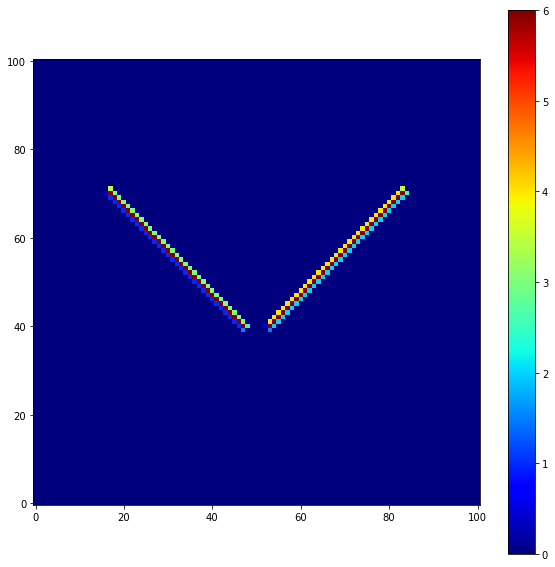

In [128]:
# This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
# as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:
#
# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi


def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

L = 100
PHI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101):
    PHI[i, 0] = 1

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))


# we want two linear slope 1 lines at specified positions:
# They will be from (17, 70) to (47, 40) and from (53, 40) to (83, 70)


#Ok wow I really need to clean this up 
#Important points to keep track of:::
lfunnelstart = 17
lfunnelend = 47

rfunnelstart = 53
rfunnelend = 83

bottom = 40
top = 70

j = top
for i in range(lfunnelstart, lfunnelend+1):
    Object[i, j] =6
    j -= 1
    
j = bottom
for i in range(rfunnelstart, rfunnelend+1):
    Object[i, j] = 6
    j += 1
    
j = bottom
for i in range(rfunnelstart, rfunnelend+1):
    PHI[i, j] = 1
    j += 1

j = top
for i in range(lfunnelstart, lfunnelend+1):
    PHI[i, j] = 1
    j -= 1
    
    
# Jacobi helpers:


TopLeftMask = zeros((L+1, L+1))
BottomLeftMask = zeros((L+1, L+1))
TopRightMask = zeros((L+1, L+1))
BottomRightMask = zeros((L+1, L+1))


#Create masking system: 1 = two directional losses
#                       >1 = vertical directional loss
#                       <1 = horizontal directional loss



j = top + 1
for i in range(lfunnelstart, lfunnelend+2):
    if i == 17:
        TopLeftMask[i, j] = 3.5
    
    elif i == 48:
        TopLeftMask[i, j] = 2.5
    
    else: 
        TopLeftMask[i, j] = 3
        
    j -= 1
    
    
j = top
for i in range(lfunnelstart-1, lfunnelend+1):
    if i == 16:
        BottomLeftMask[i, j] = 0.5
    
    elif i == 47:
        BottomLeftMask[i, j] = 1.5
        
    else:
        BottomLeftMask[i, j] = 1
        
    j -= 1

    
j = bottom
for i in range(rfunnelstart-1, rfunnelend+1):
    if i == 52:
        TopRightMask[i, j] = 0.5
        
    elif i == 83:
        TopRightMask[i, j] = 3.5
        
    else: 
        TopRightMask[i, j] = 4
        
    j += 1
    
    
j = bottom - 1
for i in range(rfunnelstart, rfunnelend+2):
    if i == 53:
        BottomRightMask[i, j] = 1.5
    elif i == 84:
        BottomRightMask[i, j] = 2.5
    else:
        BottomRightMask[i, j] = 2
    j += 1


#OKKK!!!!
# SOOOOOO!!! We built a whole numerical system to help the jacobi method pay attention to what it needs to when it needs to
# Thinking about it now, I should probably code this system more efficiently, but it's a little complex on it's own 
# and needs to be fleshed out. SO, for now, we hard code. But heres a basic explanation:

# If the 2-D plane is broken into 4 quadrants and we take all positive and negative unit vectors, as well as all unit vectors
# that have a reference angle of +- pi/4, then we have 8 vectors describing all possible cardinal directions and all their 
# combinations 



# 0 = Regular Jacobi method (default)
# 0.5 = xhat lost
# 1   = xhat + yhat lost
# 1.5 = yhat lost
# 2   = -xhat + yhat lost
# 2.5 = -xhat lost
# 3   = -yhat - xhat lost
# 3.5 = -yhat lost
# 4   = xhat - yhat

#The beauty of this system: you just add up all the masks in the end!
Object = TopLeftMask + TopRightMask + BottomLeftMask + BottomRightMask + Object


while error>error_tolerance:
    Pold = PHI.copy()
    error = 0
    
    for i in range(0, 101):
        for j in range(1, 100):
            #Time for the helpers to go to work!
            if Object[i, j] > 0 and Object[i, j] < 10:
                
                if Object[i, j] == 0.5:
                    Pstar = (1/4)*(Pold[i, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])

                elif Object[i, j] == 1:
                    Pstar = (1/4)*(Pold[i, j]+PHI[i-1, j]+Pold[i, j]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])

                elif Object[i, j] == 1.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                        
                elif Object[i, j] == 2:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i, j]+Pold[i, j]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
            
                elif Object[i, j] == 2.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                
                elif Object[i, j] == 3:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i, j]+Pold[i, j+1]+PHI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                
                elif Object[i, j] == 3.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 4:
                    Pstar = (1/4)*(Pold[i, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                
                
                
                
            #Regular Jacobi (with repetition in x)
            elif Object[i, j] == 0:
                if i == 0 or i == 100:
                
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PHI[100, j]+Pold[i, j+1]+PHI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PHI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PHI[i, j] - Pold[i, j])
                        
                        
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])
                
                

            
    #Vectors       
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)
for i in range(2, 10):
    for j in range(2, 10):
        [Vx, Vy] = VFieldFinder1(PHI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = Vx 
        Vy1[10*(i), 10*(j)] = Vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j

for i in range(1, 10):
    for j in range(1, 10):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j


mask = np.logical_or(Vx2 != 0, Vy2 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]


#VERY CONFUSED AS TO WHY THE FUNNEL WILL NOT STAY YELLOW AS INTENDED.
#MAKES ME THINK FUNNEL IS BEING UPDATED, BUT JACOBI HELPERS STILL SEEM TO WORK
#IN MAKING THE REST OF THE SQUARES IGNORE THE FUNNEL



figure = plt.figure(figsize = (10, 10))
#quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(Object.transpose(), origin = 'lower', cmap = 'jet')
colorbar()

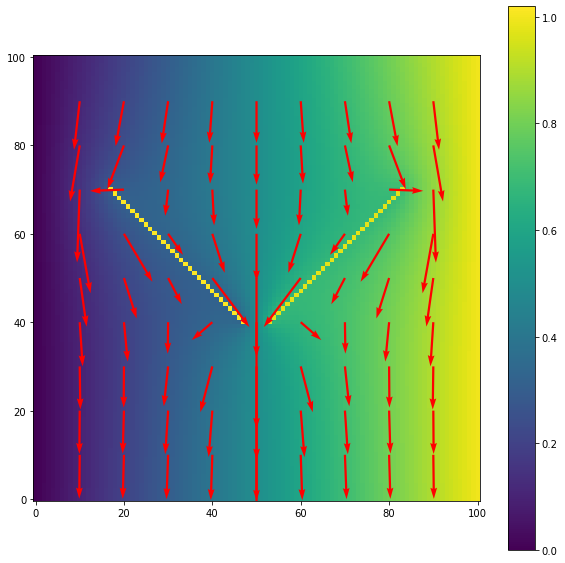

In [125]:
from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi


def VFieldFinder1(MTX, i, j, delta):
    vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (vx, vy)

def VFieldFinder2(MTX, i, j, delta):
    vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (vx, vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for j in range(0, 101):
    PSI[100, j] = 1
    
for j in range(0, 101):
    for i in range(0, 101):
        PSI[i, j] = i / 100


    
    
    

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))


j = 70
for i in range(17, 48):
    Object[i, j] = 0.7 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 0.3 
    j += 1
    
j = 40
for i in range(53, 84):
    PSI[i, j] = 0.68
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 0.32
    j -= 1
    
    
        
# Different initial values for PSI in the Object cause the stream to have a preferential flow either one way or another around
# the object. When the object's PSI value seems to be the same as the initial PSI conditions around it, the stream flow around
# either side of the object seems even. However, this aspect of the stream function to allow the stream direction to be 
# based on the object's inherent PSI value as opposed to Vxclusively its shape makes me wonder about the physical validity of 
# this equation when there are object's present (I understand the Vxtreme advantages in complicated closed domain problems
# with no objects present)

#We will continue to work and research anyways
while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(1, 100):
        for j in range(1, 100):
            if Object[i, j] == 0:
                if i == 0 or i == 100:

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                    
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

    #Vectors                
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)
for i in range(1, 3):
    for j in range(2, 10):
        [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = vx 
        Vy1[10*(i), 10*(j)] = vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j

for i in range(1, 10):
    for j in range(1, 10):
        [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = vx 
        Vy1[10*(i), 10*(j)] = vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j
        
        
mask = np.logical_or(Vx1 != 0, Vy1 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]

PSI += Object

#Very hard to see funnel, and at that, each funnel side is set to a different psi value

figure = plt.figure(figsize = (10, 10))
quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PSI.transpose(), origin = 'lower')
colorbar()

Beautiful


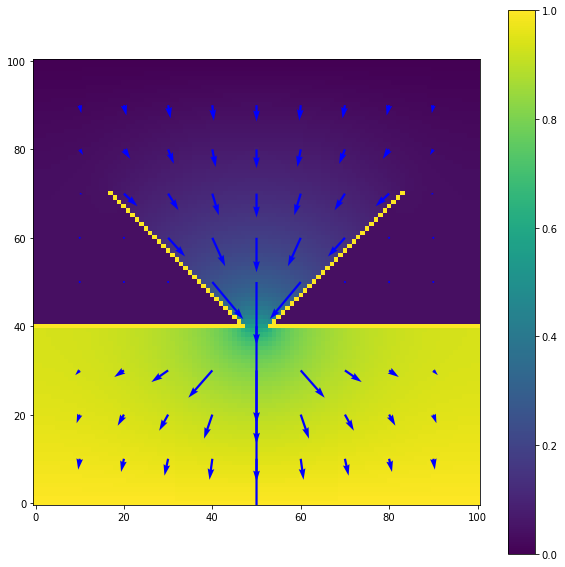

In [67]:

# This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
# as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:
#
# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi


def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101):
    PSI[i, j] = 1

error = 10000
error_tolerance = 0.01
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))

# Jacobi helpers:
TopLeftMask = zeros((L+1, L+1))
BottomLeftMask = zeros((L+1, L+1))
TopRightMask = zeros((L+1, L+1))
BottomRightMask = zeros((L+1, L+1))
TopBlock = zeros((L+1, L+1))
BottomBlock = zeros((L+1, L+1))
#Oh wow I really need to clean this up a little bit:






# we want two linear slope 1 lines at specified positions:
# They will be from (17, 70) to (47, 40) and from (53, 40) to (83, 70)

j = 40
for i in range(53, 84):
    PSI[i, j] = 1
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 1
    j -= 1
    
j = 40
for i in range(0, 47):
    PSI[i, j] = 1
for i in range(54, 101):
    PSI[i, j] = 1
    






#Create masking system: 1 = two directional losses
#                       >1 = vertical directional loss
#                       <1 = horizontal directional loss



j = 71
for i in range(17, 49):
    if i == 17:
        TopLeftMask[i, j] = 3.5
    elif i == 48:
        TopLeftMask[i, j] = 2.5

    else: 
        TopLeftMask[i, j] = 3  
    j -= 1
    
    
j = 70
for i in range(16, 48):
    if i == 16:
        BottomLeftMask[i, j] = 0.5 
    elif i == 48:
        BottomLeftMask[i, j] = 1.5        
    else:
        BottomLeftMask[i, j] = 1
        
    j -= 1

    
j = 40
for i in range(52, 84):
    if i == 52:
        TopRightMask[i, j] = 0.5
        
    elif i == 83:
        TopRightMask[i, j] = 3.5
        
    else: 
        TopRightMask[i, j] = 4
        
    j += 1
    
    
j = 39
for i in range(53, 85):
    if i == 53:
        BottomRightMask[i, j] = 1.5
    elif i == 84:
        BottomRightMask[i, j] = 2.5
    else:
        BottomRightMask[i, j] = 2
    j += 1


j = 41
for i in range(0, 46):
    TopBlock[i, j] = 3.5
        
for i in range(55, 101):
    TopBlock[i, j] = 3.5
    
    
j = 39
for i in range(0, 48):
    if i == 47:
        BottomBlock[i, j] = 1
    else:
        BottomBlock[i, j] = 1.5
        
for i in range(53, 101):
    if i == 53:
        BottomBlock[i, j] = -0.5
    else:
        BottomBlock[i, j] = 1.5

j = 70
for i in range(17, 48):
    Object[i, j] = 10 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 10 
    j += 1

j = 40
for i in range(0, 47):
    Object[i, j] = 10
for i in range(54, 101):
    Object[i, j] = 10

#OKKK!!!!
# SOOOOOO!!! We built a whole numerical system to help the jacobi method pay attention to what it needs to when it needs to
# Thinking about it now, I should probably code this system more efficiently, but it's a little complex on it's own 
# and needs to be fleshed out. SO, for now, we hard code. But heres a basic explanation:

# If the 2-D plane is broken into 4 quadrants and we take all positive and negative unit vectors, as well as all unit vectors
# that have a reference angle of +- pi/4, then we have 8 vectors describing all possible cardinal directions and all their 
# combinations 



# 0 = Regular Jacobi method (default)
# 0.5 = xhat lost
# 1   = xhat + yhat lost
# 1.5 = yhat lost
# 2   = -xhat + yhat lost
# 2.5 = -xhat lost
# 3   = -yhat - xhat lost
# 3.5 = -yhat lost
# 4   = xhat - yhat
# 4.5 = ONLY -xhat evaluated
# 5.5 = ONLY xhat evaluated

#The beauty of this system, you just add up all the masks in the end!

Object += TopLeftMask + TopRightMask + BottomLeftMask + BottomRightMask + TopBlock + BottomBlock


while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(0, 101):
        for j in range(1, 100):
            #Time for the helpers to go to work!
            if Object[i, j] != 0:
                
                if Object[i, j] == 0.5:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

                elif Object[i, j] == 1:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                #Had to make sure the helpers on the edges knew about repetition in x:
                elif Object[i, j] == 1.5:
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    elif i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    else:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                        
                elif Object[i, j] == 2:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
            
                elif Object[i, j] == 2.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                elif Object[i, j] == 3:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j+1]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                #Had to make sure the helpers on the edges knew about repetition in x:
                elif Object[i, j] == 3.5:
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    elif i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    else:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 4:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 4.5:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 5.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                #Whew, thanks helpers!
                
            #Regular Jacobi (with repetition in x)
            elif Object[i, j] == 0:
                if i == 0 or i == 100:
                
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                        
                        
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                

           
    #Vectors        
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

for i in range(1, 10):
    
    if i == 5:
        for j in range(1, 10):
            [Vx, Vy] = VFieldFinder2(PSI, 10*i, 10*j, delta)
            Vx2[10*(i), 10*(j)] = Vx 
            Vy2[10*(i), 10*(j)] = Vy
            X2[10*(i), 10*(j)] = 10*i 
            Y2[10*(i), 10*(j)] = 10*j
    else:
        
        for j in range(5, 10):
            [Vx, Vy] = VFieldFinder2(PSI, 10*i, 10*j, delta)
            Vx2[10*(i), 10*(j)] = Vx 
            Vy2[10*(i), 10*(j)] = Vy
            X2[10*(i), 10*(j)] = 10*i 
            Y2[10*(i), 10*(j)] = 10*j
        for j in range(1, 4):
            [Vx, Vy] = VFieldFinder2(PSI, 10*i, 10*j, delta)
            Vx2[10*(i), 10*(j)] = Vx 
            Vy2[10*(i), 10*(j)] = Vy
            X2[10*(i), 10*(j)] = 10*i 
            Y2[10*(i), 10*(j)] = 10*j


mask = np.logical_or(Vx2 != 0, Vy2 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]


#I'm not too worried about there being no flow inbetween bottles. In the actual Bangladeshian airconditioners, the bottles
# are so tighlty packedtogether I imagine the flow between them is minimal (due to the minimal space). 

figure = plt.figure(figsize = (10, 10))
#quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PSI.transpose(), origin = 'lower')
colorbar()
print("Beautiful")

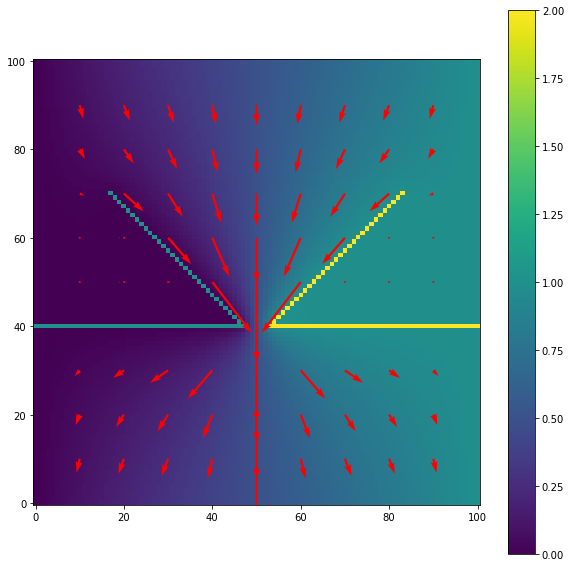

In [136]:
from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi


def VFieldFinder1(MTX, i, j, delta):
    vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (vx, vy)

def VFieldFinder2(MTX, i, j, delta):
    vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (vx, vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))
Object = zeros((L+1, L+1))

i = 0
j = 0

for j in range(0, 101):
    PSI[100, j] = 1
    
for j in range(0, 101):
    for i in range(0, 101):
        PSI[i, j] = i / 100


j = 40
for i in range(0, 47):
    Object[i, j] = 1
for i in range(54, 101):
    Object[i, j] = 1    
    
    
j = 40
for i in range(0, 47):
    PSI[i, j] = 0
for i in range(54, 101):
    PSI[i, j] = 1    

    
error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))




j = 70
for i in range(17, 48):
    Object[i, j] = 1 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 1 
    j += 1
    
j = 40
for i in range(53, 84):
    PSI[i, j] = 1
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 0
    j -= 1
    
    
        
# Different initial values for PSI in the Object cause the stream to have a preferential flow either one way or another around
# the object. When the object's PSI value seems to be the same as the initial PSI conditions around it, the stream flow around
# either side of the object seems even. However, this aspect of the stream function to allow the stream direction to be 
# based on the object's inherent PSI value as opposed to Vxclusively its shape makes me wonder about the physical validity of 
# this equation when there are object's present (I understand the Vxtreme advantages in complicated closed domain problems
# with no objects present)

#We will continue to work and research anyways
while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(1, 100):
        for j in range(1, 100):
            if Object[i, j] == 0:
                if i == 0 or i == 100:

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                    
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

    #Vectors                
delta = 0.0045
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)


for i in range(1, 10):
    if i == 5:
        for j in range(1, 10):
            [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
            Vx1[10*(i), 10*(j)] = vx 
            Vy1[10*(i), 10*(j)] = vy
            X1[10*(i), 10*(j)] = 10*i 
            Y1[10*(i), 10*(j)] = 10*j
            
    else:
        for j in range(1, 4):
            [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
            Vx1[10*(i), 10*(j)] = vx 
            Vy1[10*(i), 10*(j)] = vy
            X1[10*(i), 10*(j)] = 10*i 
            Y1[10*(i), 10*(j)] = 10*j

        for j in range(5, 10):
            [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
            Vx1[10*(i), 10*(j)] = vx 
            Vy1[10*(i), 10*(j)] = vy
            X1[10*(i), 10*(j)] = 10*i 
            Y1[10*(i), 10*(j)] = 10*j


mask = np.logical_or(Vx1 != 0, Vy1 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]

PSI += Object

#Very hard to see funnel, and at that, each funnel side is set to a different psi value

figure = plt.figure(figsize = (10, 10))
quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 60, width = 0.005)
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PSI.transpose(), origin = 'lower')
#imshow(Object.transpose(), origin = 'lower')
colorbar()

3.5


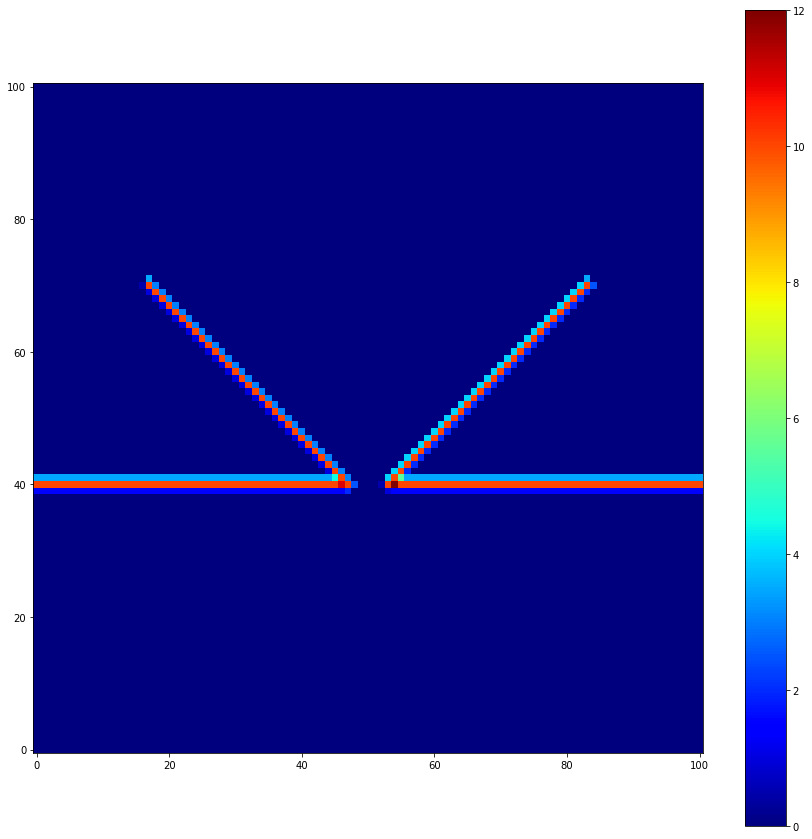

In [70]:
%reset -f

# This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
# as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:
#
# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi


def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101):
    PSI[i, j] = 1

error = 10000
error_tolerance = 0.01
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))
# Jacobi helpers:
TopLeftMask = zeros((L+1, L+1))
BottomLeftMask = zeros((L+1, L+1))
TopRightMask = zeros((L+1, L+1))
BottomRightMask = zeros((L+1, L+1))
TopBlock = zeros((L+1, L+1))
BottomBlock = zeros((L+1, L+1))
#Oh wow I really need to clean this up a little bit::::






# we want two linear slope 1 lines at specified positions:
# They will be from (17, 70) to (47, 40) and from (53, 40) to (83, 70)


    

j = 40
for i in range(53, 84):
    PSI[i, j] = 1
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 1
    j -= 1
    
j = 40
for i in range(0, 47):
    PSI[i, j] = 1
for i in range(54, 101):
    PSI[i, j] = 1
    






#Create masking system: 1 = two directional losses
#                       >1 = vertical directional loss
#                       <1 = horizontal directional loss



j = 71
for i in range(17, 49):
    if i == 17:
        TopLeftMask[i, j] = 3.5
    elif i == 48:
        TopLeftMask[i, j] = 2.5

    else: 
        TopLeftMask[i, j] = 3  
    j -= 1
    
    
j = 70
for i in range(16, 48):
    if i == 16:
        BottomLeftMask[i, j] = 0.5 
    elif i == 48:
        BottomLeftMask[i, j] = 1.5        
    else:
        BottomLeftMask[i, j] = 1
        
    j -= 1

    
j = 40
for i in range(52, 84):
    if i == 52:
        TopRightMask[i, j] = 0.5
        
    elif i == 83:
        TopRightMask[i, j] = 3.5
        
    else: 
        TopRightMask[i, j] = 4
        
    j += 1
    
    
j = 39
for i in range(53, 85):
    if i == 53:
        BottomRightMask[i, j] = 1.5
    elif i == 84:
        BottomRightMask[i, j] = 2.5
    else:
        BottomRightMask[i, j] = 2
    j += 1


j = 41
for i in range(0, 46):
    TopBlock[i, j] = 3.5
        
for i in range(55, 101):
    TopBlock[i, j] = 3.5
    
    
j = 39
for i in range(0, 48):
    if i == 47:
        BottomBlock[i, j] = 1
    else:
        BottomBlock[i, j] = 1.5
        
for i in range(53, 101):
    if i == 53:
        BottomBlock[i, j] = -0.5
    else:
        BottomBlock[i, j] = 1.5

j = 70
for i in range(17, 48):
    Object[i, j] = 10 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 10 
    j += 1

j = 40
for i in range(0, 47):
    Object[i, j] = 10
for i in range(54, 101):
    Object[i, j] = 10
#OKKK!!!!
# SOOOOOO!!! We built a whole numerical system to help the jacobi method pay attention to what it needs to when it needs to
# Thinking about it now, I should probably code this system more efficiently, but it's a little complex on it's own 
# and needs to be fleshed out. SO, for now, we hard code. But heres a basic explanation:

# If the 2-D plane is broken into 4 quadrants and we take all positive and negative unit vectors, as well as all unit vectors
# that have a reference angle of +- pi/4, then we have 8 vectors describing all possible cardinal directions and all their 
# combinations 



# 0 = Regular Jacobi method (default)
# 0.5 = xhat lost
# 1   = xhat + yhat lost
# 1.5 = yhat lost
# 2   = -xhat + yhat lost
# 2.5 = -xhat lost
# 3   = -yhat - xhat lost
# 3.5 = -yhat lost
# 4   = xhat - yhat
# 4.5 = ONLY -xhat evaluated
# 5.5 = ONLY xhat evaluated

#The beauty of this system, you just add up all the masks in the end!

Object += TopLeftMask + TopRightMask + BottomLeftMask + BottomRightMask + TopBlock + BottomBlock 
figure = plt.figure(figsize = (15, 15))
imshow(Object.transpose(), origin = 'lower', cmap= 'jet')
colorbar()
print(Object[56, 41])

31.018374130416287
0.014058448453822515
2.3257684495810884


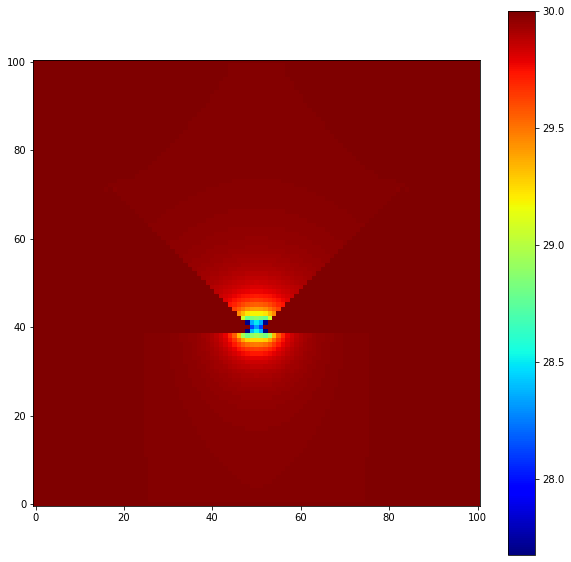

In [95]:

# This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
# as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:
#
# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi, sqrt


def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101):
    PSI[i, j] = 3

error = 10000
error_tolerance = 0.01
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))

# Jacobi helpers:
TopLeftMask = zeros((L+1, L+1))
BottomLeftMask = zeros((L+1, L+1))
TopRightMask = zeros((L+1, L+1))
BottomRightMask = zeros((L+1, L+1))
TopBlock = zeros((L+1, L+1))
BottomBlock = zeros((L+1, L+1))
#Oh wow I really need to clean this up a little bit:






# we want two linear slope 1 lines at specified positions:
# They will be from (17, 70) to (47, 40) and from (53, 40) to (83, 70)

j = 40
for i in range(53, 84):
    PSI[i, j] = 1
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 1
    j -= 1
    
j = 40
for i in range(0, 47):
    PSI[i, j] = 1
for i in range(54, 101):
    PSI[i, j] = 1
    






#Create masking system: 1 = two directional losses
#                       >1 = vertical directional loss
#                       <1 = horizontal directional loss



j = 71
for i in range(17, 49):
    if i == 17:
        TopLeftMask[i, j] = 3.5
    elif i == 48:
        TopLeftMask[i, j] = 2.5

    else: 
        TopLeftMask[i, j] = 3  
    j -= 1
    
    
j = 70
for i in range(16, 48):
    if i == 16:
        BottomLeftMask[i, j] = 0.5 
    elif i == 48:
        BottomLeftMask[i, j] = 1.5        
    else:
        BottomLeftMask[i, j] = 1
        
    j -= 1

    
j = 40
for i in range(52, 84):
    if i == 52:
        TopRightMask[i, j] = 0.5
        
    elif i == 83:
        TopRightMask[i, j] = 3.5
        
    else: 
        TopRightMask[i, j] = 4
        
    j += 1
    
    
j = 39
for i in range(53, 85):
    if i == 53:
        BottomRightMask[i, j] = 1.5
    elif i == 84:
        BottomRightMask[i, j] = 2.5
    else:
        BottomRightMask[i, j] = 2
    j += 1


j = 41
for i in range(0, 46):
    TopBlock[i, j] = 3.5
        
for i in range(55, 101):
    TopBlock[i, j] = 3.5
    
    
j = 39
for i in range(0, 48):
    if i == 47:
        BottomBlock[i, j] = 1
    else:
        BottomBlock[i, j] = 1.5
        
for i in range(53, 101):
    if i == 53:
        BottomBlock[i, j] = -0.5
    else:
        BottomBlock[i, j] = 1.5

j = 70
for i in range(17, 48):
    Object[i, j] = 10 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 10 
    j += 1

j = 40
for i in range(0, 47):
    Object[i, j] = 10
for i in range(54, 101):
    Object[i, j] = 10

#OKKK!!!!
# SOOOOOO!!! We built a whole numerical system to help the jacobi method pay attention to what it needs to when it needs to
# Thinking about it now, I should probably code this system more efficiently, but it's a little complex on it's own 
# and needs to be fleshed out. SO, for now, we hard code. But heres a basic explanation:

# If the 2-D plane is broken into 4 quadrants and we take all positive and negative unit vectors, as well as all unit vectors
# that have a reference angle of +- pi/4, then we have 8 vectors describing all possible cardinal directions and all their 
# combinations 



# 0 = Regular Jacobi method (default)
# 0.5 = xhat lost
# 1   = xhat + yhat lost
# 1.5 = yhat lost
# 2   = -xhat + yhat lost
# 2.5 = -xhat lost
# 3   = -yhat - xhat lost
# 3.5 = -yhat lost
# 4   = xhat - yhat
# 4.5 = ONLY -xhat evaluated
# 5.5 = ONLY xhat evaluated

#The beauty of this system, you just add up all the masks in the end!

Object += TopLeftMask + TopRightMask + BottomLeftMask + BottomRightMask + TopBlock + BottomBlock


while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(0, 101):
        for j in range(1, 100):
            #Time for the helpers to go to work!
            if Object[i, j] != 0:
                
                if Object[i, j] == 0.5:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

                elif Object[i, j] == 1:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                #Had to make sure the helpers on the edges knew about repetition in x:
                elif Object[i, j] == 1.5:
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    elif i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    else:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                        
                elif Object[i, j] == 2:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
            
                elif Object[i, j] == 2.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                elif Object[i, j] == 3:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j+1]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                #Had to make sure the helpers on the edges knew about repetition in x:
                elif Object[i, j] == 3.5:
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    elif i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    else:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 4:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 4.5:
                    Pstar = (1/4)*(Pold[i, j]+PSI[i-1, j]+Pold[i, j]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                    
                elif Object[i, j] == 5.5:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i, j]+Pold[i, j]+PSI[i, j])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                #Whew, thanks helpers!
                
            #Regular Jacobi (with repetition in x)
            elif Object[i, j] == 0:
                if i == 0 or i == 100:
                
                    if i == 0:
                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                        
                        
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])
                
                

           
    #Vectors        
delta = 0.0045
i = 0
j = 0


Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])
Vel = zeros([101, 101])

for i in range(1, 100):
    for j in range(1, 100): 
        if Object[i, j] == 0 :
            [vx, vy] = VFieldFinder2(PSI, i, j, delta)
            Vx2[(i), (j)] = vx 
            Vy2[(i), (j)] = vy
            X2[(i), (j)] = i 
            Y2[(i), (j)] = j
            Vel[i, j] = sqrt(vx**2+vy**2)

        
        
        
        
mask = np.logical_or(Vx2 != 0, Vy2 != 0)



Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]

Temp = zeros([101, 101])

for i in range(0, 101):
    for j in range(0, 101):
        Temp[i, j] = 30 - (Vel[i, j]**2/(2*287.058))

#I'm not too worried about there being no flow inbetween bottles. In the actual Bangladeshian airconditioners, the bottles
# are so tighlty packedtogether I imagine the flow between them is minimal (due to the minimal space). 

figure = plt.figure(figsize = (10, 10))
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 0.1, width = 0.005)
imshow(Temp.transpose(), origin = 'lower', cmap = 'jet')
colorbar()
print(Vel[50, 40])
print(Vel[80, 50])
print(Vel[50, 99])

28.926714814947463
0.026694371455161642
2.2642495043978297


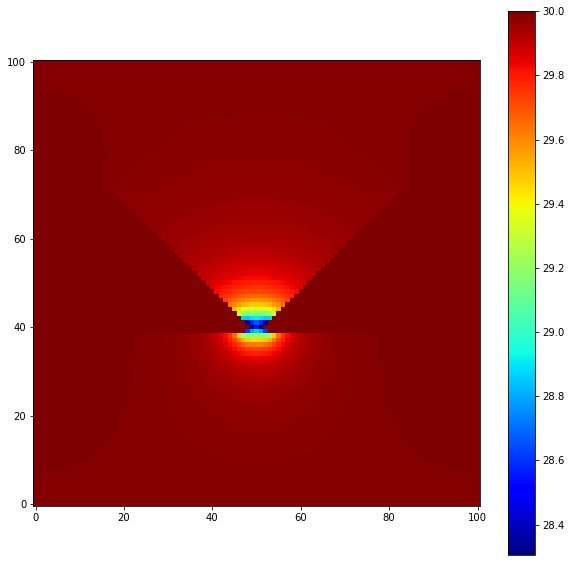

In [97]:
from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi, sqrt


def VFieldFinder1(MTX, i, j, delta):
    vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (vx, vy)

def VFieldFinder2(MTX, i, j, delta):
    vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (vx, vy)

L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))
Object = zeros((L+1, L+1))

i = 0
j = 0

for j in range(0, 101):
    PSI[100, j] = 1
    
for j in range(0, 101):
    for i in range(0, 101):
        PSI[i, j] = i / 100


j = 40
for i in range(0, 47):
    Object[i, j] = 1
for i in range(54, 101):
    Object[i, j] = 1    
    
    
j = 40
for i in range(0, 47):
    PSI[i, j] = 0
for i in range(54, 101):
    PSI[i, j] = 1    

    
error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))




j = 70
for i in range(17, 48):
    Object[i, j] = 1 
    j -= 1
    
j = 40
for i in range(53, 84):
    Object[i, j] = 1 
    j += 1
    
j = 40
for i in range(53, 84):
    PSI[i, j] = 1
    j += 1

j = 70
for i in range(17, 48):
    PSI[i, j] = 0
    j -= 1
    
    
        
# Different initial values for PSI in the Object cause the stream to have a preferential flow either one way or another around
# the object. When the object's PSI value seems to be the same as the initial PSI conditions around it, the stream flow around
# either side of the object seems even. However, this aspect of the stream function to allow the stream direction to be 
# based on the object's inherent PSI value as opposed to Vxclusively its shape makes me wonder about the physical validity of 
# this equation when there are object's present (I understand the Vxtreme advantages in complicated closed domain problems
# with no objects present)

#We will continue to work and research anyways
while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(1, 100):
        for j in range(1, 100):
            if Object[i, j] == 0:
                if i == 0 or i == 100:

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                    
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

    #Vectors                
delta = 0.0045
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])
Vel = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)


for i in range(1, 100):
    for j in range(1, 100):
        if Object[i, j] < 1 and Object[i+1, j] < 1 and Object[i-1, j] < 1 and Object[i, j+1] < 1 and Object[i, j-1] < 1:
            [vx, vy] = VFieldFinder1(PSI, i, j, delta)
            Vx1[(i), (j)] = vx 
            Vy1[(i), (j)] = vy
            X1[(i), (j)] = i 
            Y1[(i), (j)] = j
            Vel[i, j] = sqrt(vx**2 + vy**2)


mask = np.logical_or(Vx1 != 0, Vy1 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

PSI += Object

#Very hard to see funnel, and at that, each funnel side is set to a different psi value

Temp = zeros([101, 101])

for i in range(0, 101):
    for j in range(0, 101):
        Temp[i, j] = 30 - (Vel[i, j]**2/(2*287.058))


figure = plt.figure(figsize = (10, 10))
#quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 30, width = 0.005)
imshow(Temp.transpose(), origin = 'lower', cmap = 'jet')
colorbar()
print(Vel[50, 40])
print(Vel[80, 50])
print(Vel[50, 99])

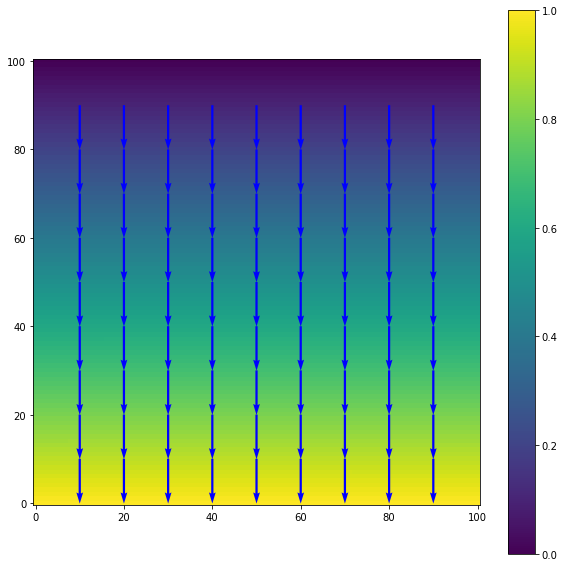

In [100]:
#This is Laplace's Equation for the VELOCITY POTENTIAL FUNCTION. The blue vectors are the fluid's velocity
#as evaluated at the tail of each vector

#Some notes: I have specific questions concerning the physics behind how I SET UP the way in which Jacobi Method and the
# velocity potential interacts with the object. All I did was make sure that when the Jacobi Method updates a square 
# that's nVxt to the object in anyway, the Method ignores whichever square it's nVxt to that is defined as "the object". 
# Alternatively, when looking for that object defined square for program information, all it finds is the same information as is 
# contained in the square that it's updating AT THE TIME it is looking at the object defined square (allows use of GS and SOR).
# My physical thinking behind THIS SPECIFIC way I've modified the Jacobi Method to interact with my object is based on 
# the actual physics and math behind velocity potential:

# If our discretized model is to remain physically accurate, then NO SQUARES BORDERING THE OBJECT CAN BE EVALUATED TO HAVE 
# VELOCITY VECTORS WHICH POINT INTO OR OUT OF THE OBJECT IN ANY WAY. If this were to happen, the those bordering squares in our
# model can only be interpretted as FEEDING FLUID INTO THE OBJECT, at which point, the VELOCITY POTENTIAL of the object would 
# come into question. However, if our object is meant to be independent of the velocity potential function (i.e, only the  
# object's shape is considered and it contributes no overall potential to object bordering squares), then upon being updated by 
# the Jacobi Method, the object bordering squares must see no additional potential contributions from the object itself.
# This assures that there will be no fluid velocity flow into or out of the object. The changes I've made to the Jacobi 
# Method mentioned above should, I hope, reflect this physical interpretation in my model. 

from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi

#Functions to find Velocity vectors
def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

#Setting things up
L = 100
PHI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for i in range(0, 101): #Bottom bar = 1 (unchanged)
    PHI[i, 0] = 1

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))

#Setting up the object mask and making it visible (PHI = 1)


while error>error_tolerance:
    Pold = PHI.copy()
    error = 0
    
    for i in range(0, 101):
        for j in range(1, 100):
            if i == 0 or i == 100: #making sides repeat

                if i == 0:

                    Pstar = (1/4)*(Pold[i+1, j]+PHI[100, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])

                elif i == 100:
                    Pstar = (1/4)*(Pold[0, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PHI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PHI[i, j] - Pold[i, j])

              # No more helping, this is just standard objectless SOR  
            else:
                Pstar = (1/4)*(Pold[i+1, j]+PHI[i-1, j]+Pold[i, j+1]+PHI[i, j-1])
                deltaP = Pstar - Pold[i, j]
                PHI[i, j] = Pold[i, j] + alpha*deltaP
                error += abs(PHI[i, j] - Pold[i, j])

#Setting up vector fields and quiver
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])


#This is to create the correct vectors (I know I should have used a mask here but I was struggling to, may revise)
mask = zeros([101, 101], dtype= bool)

        
for i in range(1, 10):
    for j in range(1, 10):
        [Vx, Vy] = VFieldFinder2(PHI, 10*i, 10*j, delta)
        Vx2[10*(i), 10*(j)] = Vx 
        Vy2[10*(i), 10*(j)] = Vy
        X2[10*(i), 10*(j)] = 10*i 
        Y2[10*(i), 10*(j)] = 10*j

        
mask = np.logical_or(Vx2 != 0, Vy2 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]





figure = plt.figure(figsize = (10, 10))
#quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PHI.transpose(), origin = 'lower')
colorbar()

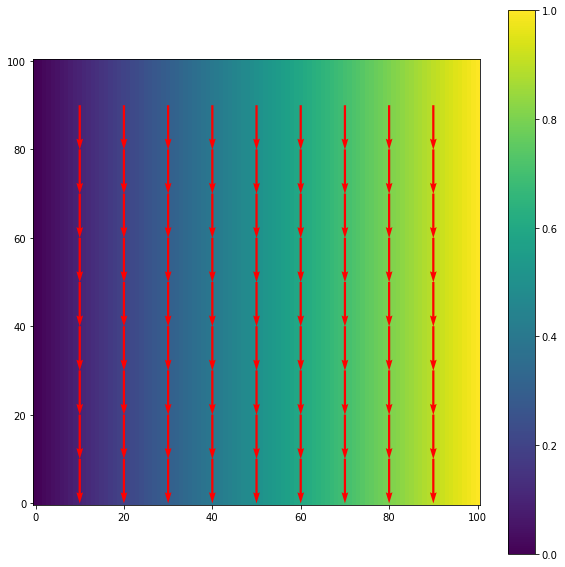

In [101]:
from pylab import imshow, colorbar, gray, quiver
from numpy import zeros, array, size, transpose 
import numpy as np
from matplotlib import pyplot as plt
from math import pi

#Functions for vectors
def VFieldFinder1(MTX, i, j, delta):
    Vx = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    Vy = -(MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    
    return (Vx, Vy)

def VFieldFinder2(MTX, i, j, delta):
    Vx = (MTX[i+1, j]-MTX[i-1, j])/(2*delta)
    Vy = (MTX[i, j+1]-MTX[i, j-1])/(2*delta)
    
    return (Vx, Vy)

#Setting things up
L = 100
PSI = zeros((L+1, L+1))
Pstar = zeros((L+1, L+1))

i = 0
j = 0

for j in range(0, 101):
    PSI[100, j] = 1
    
for j in range(0, 101):
    for i in range(0, 101):
        PSI[i, j] = i / 100


position1 = 38 
position2 = position1+26
    

error = 10000
error_tolerance = 0.1
alpha = 2/(1+(pi/L))

Object = zeros((L+1, L+1))




        
# Different initial values for PSI in the Object cause the stream to have a preferential flow either one way or another around
# the object. When the object's PSI value seems to be the same as the initial PSI conditions around it, the stream flow around
# either side of the object seems even. However, this aspect of the stream function to allow the stream direction to be 
# based on the object's inherent PSI value as opposed to vxclusively its shape makes me wonder about the physical validity of 
# this equation when there are object's present (I understand the vxtreme advantages in complicated closed domain problems
# with no objects present)

#We will continue to work and research


while error>error_tolerance:
    Pold = PSI.copy()
    error = 0
    
    for i in range(1, 100):
        for j in range(1, 100):
            if Object[i, j] == 0:
                if i == 0 or i == 100:

                    if i == 0:

                        Pstar = (1/4)*(Pold[i+1, j]+PSI[100, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])

                    if i == 100:
                        Pstar = (1/4)*(Pold[0, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                        deltaP = Pstar - Pold[i, j]
                        PSI[i, j] = Pold[i, j] + alpha*deltaP
                        error += abs(PSI[i, j] - Pold[i, j])
                    
                    
                else:
                    Pstar = (1/4)*(Pold[i+1, j]+PSI[i-1, j]+Pold[i, j+1]+PSI[i, j-1])
                    deltaP = Pstar - Pold[i, j]
                    PSI[i, j] = Pold[i, j] + alpha*deltaP
                    error += abs(PSI[i, j] - Pold[i, j])

                    
delta = 0.01
i = 0
j = 0
Vx1 = zeros([101, 101])
Vy1 = zeros([101, 101])
X1 = zeros([101, 101])
Y1 = zeros([101, 101])

Vx2 = zeros([101, 101])
Vy2 = zeros([101, 101])
X2 = zeros([101, 101])
Y2 = zeros([101, 101])

mask = zeros([101, 101], dtype= bool)
for i in range(1, 10):
    for j in range(1, 10):
        [vx, vy] = VFieldFinder1(PSI, 10*i, 10*j, delta)
        Vx1[10*(i), 10*(j)] = vx 
        Vy1[10*(i), 10*(j)] = vy
        X1[10*(i), 10*(j)] = 10*i 
        Y1[10*(i), 10*(j)] = 10*j


        
mask = np.logical_or(Vx1 != 0, Vy1 != 0)



Vx1masked = Vx1[mask]
Vy1masked = Vy1[mask]
X1 = X1[mask]
Y1 = Y1[mask]

Vx2masked = Vx2[mask]
Vy2masked = Vy2[mask]
X2 = X2[mask]
Y2 = Y2[mask]





figure = plt.figure(figsize = (10, 10))
quiver(X1.transpose(), Y1.transpose(), Vx1masked.transpose(), Vy1masked.transpose(), color = 'r', scale = 10, width = 0.005)
#quiver(X2.transpose(), Y2.transpose(), Vx2masked.transpose(), Vy2masked.transpose(), color = 'b', scale = 10, width = 0.005)
imshow(PSI.transpose(), origin = 'lower')
colorbar()